# Basics

In [1]:
import pandas as pd

In [2]:
na_vals = ['NA', 'Missing']
df = pd.read_csv("food_prices.csv", na_values=na_vals)
print(df.head(10)) # Parameter tells the function the number of rows to show
print(df.shape)
print(df.info())
# object type data usually means string
# To see all coloums, change setting: pd.set_option('display.max_columns', number_of_columns)
# To see all rows, change change setting: pd.set_option('display.max_rows', numbers_of_rows)
print(df.columns)

    Country   Year   Month  Food Item  Unit of Measurement  Average Price   \
0  Australia   2018       1      Bread                Loaf            2.20   
1  Australia   2018       2      Bread                Loaf            2.20   
2  Australia   2018       3      Bread                Loaf            2.20   
3  Australia   2018       4      Bread                Loaf            2.21   
4  Australia   2018       5      Bread                Loaf            2.21   
5  Australia   2018       6      Bread                Loaf            2.22   
6  Australia   2018       7      Bread                Loaf            2.22   
7  Australia   2018       8      Bread                Loaf            2.22   
8  Australia   2018       9      Bread                Loaf            2.23   
9  Australia   2018      10      Bread                Loaf            2.23   

  Currency   Price in USD  Availability  Quality   
0       AUD          1.47              1     High  
1       AUD          1.48            

# Selecting Rows and Column

In [3]:
people = {
    "first": ["a", "b", "c"],
    "last": ["c", "d", "e"],
    "age": [1, 2, 3]
}
df1 = pd.DataFrame(people)
print(df1)
# Like dictionaries
print(df1["first"]) # Returs a series
print(df1.age) # Latter way is better
print(df1[['first', 'last']])

  first last  age
0     a    c    1
1     b    d    2
2     c    e    3
0    a
1    b
2    c
Name: first, dtype: object
0    1
1    2
2    3
Name: age, dtype: int64
  first last
0     a    c
1     b    d
2     c    e


In [4]:
print(df1.iloc[0]) # Get rows
print(df1.iloc[[0, 1]])
print(df1.iloc[[0, 1], [0, 2]])

first    a
last     c
age      1
Name: 0, dtype: object
  first last  age
0     a    c    1
1     b    d    2
  first  age
0     a    1
1     b    2


In [5]:
print(df1.loc[[0, 1]])
print(df1.loc[[0, 1], ["first", "age"]])
# iloc is index location and loc is labelled locations

  first last  age
0     a    c    1
1     b    d    2
  first  age
0     a    1
1     b    2


In [6]:
print(df.columns)
print(df.loc[1:5, 'Year ':'Currency '])

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Unit of Measurement',
       'Average Price ', 'Currency ', 'Price in USD', 'Availability ',
       'Quality '],
      dtype='object')
   Year   Month  Food Item  Unit of Measurement  Average Price  Currency 
1   2018       2      Bread                Loaf            2.20       AUD
2   2018       3      Bread                Loaf            2.20       AUD
3   2018       4      Bread                Loaf            2.21       AUD
4   2018       5      Bread                Loaf            2.21       AUD
5   2018       6      Bread                Loaf            2.22       AUD


# Index

In [7]:
print(df1)

  first last  age
0     a    c    1
1     b    d    2
2     c    e    3


In [8]:
df1 = df1.set_index('age')
df1.sort_index(ascending=False, inplace=True)
print(df1)

    first last
age           
3       c    e
2       b    d
1       a    c


In [9]:
print(df1.loc[2])
print(df1.iloc[1])

first    b
last     d
Name: 2, dtype: object
first    b
last     d
Name: 2, dtype: object


In [10]:
df1.reset_index(inplace=True)
df1

,age,first,last
0,3,c,e
1,2,b,d
2,1,a,c


# Filtering

In [11]:
print(df[df['Quality '] == 'Medium'])
# Above filter can be put into a variable and used in a similar way
# The filter can also be put into df.loc
filt = df['Quality '] == 'Medium'
print(df.loc[filt, 'Price in USD'])
# .loc augments utility

         Country   Year   Month  Food Item  Unit of Measurement  \
720  South Africa   2018       1      Bread                Loaf   
721  South Africa   2018       2      Bread                Loaf   
722  South Africa   2018       3      Bread                Loaf   
723  South Africa   2018       4      Bread                Loaf   
724  South Africa   2018       5      Bread                Loaf   
..            ...    ...     ...        ...                 ...   
955  South Africa   2022       8   Potatoes                1 Kg   
956  South Africa   2022       9   Potatoes                1 Kg   
957  South Africa   2022      10   Potatoes                1 Kg   
958  South Africa   2022      11   Potatoes                1 Kg   
959  South Africa   2022      12   Potatoes                1 Kg   

     Average Price  Currency   Price in USD  Availability  Quality   
720           12.57       ZAR          0.69              1   Medium  
721           12.62       ZAR          0.70            

# Updating Rows and Columns

In [12]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['Country', 'Year', 'Month', 'Food Item', 'Unit of Measurement',
       'Average Price', 'Currency', 'Price in USD', 'Availability', 'Quality'],
      dtype='object')

In [13]:
df1.rename(columns={"first": "first_name"}, inplace=True)

In [14]:
print(df1)
df1["first_name"] = df1["first_name"].str.upper()
print(df1)

   age first_name last
0    3          c    e
1    2          b    d
2    1          a    c
   age first_name last
0    3          C    e
1    2          B    d
2    1          A    c


In [15]:
df["Country"].apply(len) # The inner function can be as complicated as you want

0       9
1       9
2       9
3       9
4       9
       ..
1195    6
1196    6
1197    6
1198    6
1199    6
Name: Country, Length: 1200, dtype: int64

In [16]:
def upp(a):
    return a.upper()
df["Country"].apply(upp)

0       AUSTRALIA
1       AUSTRALIA
2       AUSTRALIA
3       AUSTRALIA
4       AUSTRALIA
          ...    
1195       CANADA
1196       CANADA
1197       CANADA
1198       CANADA
1199       CANADA
Name: Country, Length: 1200, dtype: object

In [17]:
df["Country"] = df["Country"].apply(upp)
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,AUSTRALIA,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,AUSTRALIA,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,AUSTRALIA,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,AUSTRALIA,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,AUSTRALIA,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High
...,...,...,...,...,...,...,...,...,...,...
1195,CANADA,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,CANADA,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,CANADA,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,CANADA,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High


In [18]:
df["Country"] = df["Country"].apply(lambda x: x.lower().capitalize())
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High
...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High


In [19]:
df.apply(len) # This applies the function to each column Series

Country                1200
Year                   1200
Month                  1200
Food Item              1200
Unit of Measurement    1200
Average Price          1200
Currency               1200
Price in USD           1200
Availability           1200
Quality                1200
dtype: int64

In [20]:
df.apply(pd.Series.min)

Country                Australia
Year                        2018
Month                          1
Food Item                  Bread
Unit of Measurement         1 Kg
Average Price               1.22
Currency                     AUD
Price in USD                0.69
Availability                   1
Quality                     High
dtype: object

In [21]:
df.apply(lambda x: x.min()) # x is a Series object
# df.applymap(len) -- this applies the function to each element

Country                Australia
Year                        2018
Month                          1
Food Item                  Bread
Unit of Measurement         1 Kg
Average Price               1.22
Currency                     AUD
Price in USD                0.69
Availability                   1
Quality                     High
dtype: object

In [22]:
df["Quality"] = df["Quality"].map({"High": "H", "Medium": "M", "Low": "L"})
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,H
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,H
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,H
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,H
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,H
...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,H
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,H
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,H
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,H


In [23]:
df["Quality"] = df["Quality"].map({"H": "High", "M": "Medium", "L": "Low"})
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High
...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High


# Add and Remove Rows/ Columns

In [24]:
people = {
    "first": ["Corey", "Jane", "John"],
    "last": ["Schaefer", "Doe", "Doe"],
    "email": ["CoreyMSchaefer@gmail.com", "JaneDoe@gmail.com", "JohnDoe@gmail.com"]
}
df1 = pd.DataFrame(people)
df1

,first,last,email
0,Corey,Schaefer,CoreyMSchaefer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [25]:
df1["full_name"] = df1["first"] + " " + df1["last"]
df1

,first,last,email,full_name
0,Corey,Schaefer,CoreyMSchaefer@gmail.com,Corey Schaefer
1,Jane,Doe,JaneDoe@gmail.com,Jane Doe
2,John,Doe,JohnDoe@gmail.com,John Doe


In [26]:
df1.drop(columns=['first', 'last'], inplace=True)
df1

,email,full_name
0,CoreyMSchaefer@gmail.com,Corey Schaefer
1,JaneDoe@gmail.com,Jane Doe
2,JohnDoe@gmail.com,John Doe


In [27]:
df1["full_name"].str.split(" ", expand=True)

,0,1
0,Corey,Schaefer
1,Jane,Doe
2,John,Doe


In [28]:
df1[['first', 'last']] = df1["full_name"].str.split(" ", expand=True)
df1

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
1,JaneDoe@gmail.com,Jane Doe,Jane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe


In [29]:
df1 = pd.concat([df1, pd.DataFrame([{'first': 'Tony'}])], ignore_index=True)
df1

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
1,JaneDoe@gmail.com,Jane Doe,Jane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe
3,NaN,NaN,Tony,NaN


In [30]:
df1.drop(index=3) # inplace=True

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
1,JaneDoe@gmail.com,Jane Doe,Jane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe


In [31]:
filt = df1['last'] == 'Doe'
df1.drop(index=df1[filt].index)

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
3,NaN,NaN,Tony,NaN


# Sorting Data

In [32]:
df1

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
1,JaneDoe@gmail.com,Jane Doe,Jane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe
3,NaN,NaN,Tony,NaN


In [33]:
df1.sort_values(by=['last', 'first'], ascending = [False, True], inplace=True)
df1

,email,full_name,first,last
0,CoreyMSchaefer@gmail.com,Corey Schaefer,Corey,Schaefer
1,JaneDoe@gmail.com,Jane Doe,Jane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe
3,NaN,NaN,Tony,NaN


# Grouping and Aggregating

In [34]:
df

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High
...,...,...,...,...,...,...,...,...,...,...
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High


In [35]:
print(df['Price in USD'].median())
print(df['Price in USD'].mean())
print(df['Price in USD'].mode())

1.68
1.8018416666666668
0    1.39
Name: Price in USD, dtype: float64


In [36]:
df.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


In [37]:
df[['Average Price', 'Price in USD']].describe()

,Average Price,Price in USD
count,1200.000000,1200.000000
mean,59.129550,1.801842
std,103.155832,0.725390
min,1.220000,0.690000
25%,3.207500,1.170000
50%,13.355000,1.680000
75%,28.882500,2.320000
max,421.430000,4.030000


In [38]:
df['Quality'].value_counts()
# df['Quality'].value_counts(normalize=True) breaks down the number into percentages

Quality
High      960
Medium    240
Name: count, dtype: int64

In [39]:
quality_group = df.groupby(['Quality'])
print(quality_group.get_group(('High',)))
quality_group['Average Price'].value_counts()

        Country  Year  Month Food Item Unit of Measurement  Average Price  \
0     Australia  2018      1     Bread                Loaf           2.20   
1     Australia  2018      2     Bread                Loaf           2.20   
2     Australia  2018      3     Bread                Loaf           2.20   
3     Australia  2018      4     Bread                Loaf           2.21   
4     Australia  2018      5     Bread                Loaf           2.21   
...         ...   ...    ...       ...                 ...            ...   
1195     Canada  2022      8  Potatoes                1 Kg           3.17   
1196     Canada  2022      9  Potatoes                1 Kg           3.18   
1197     Canada  2022     10  Potatoes                1 Kg           3.20   
1198     Canada  2022     11  Potatoes                1 Kg           3.21   
1199     Canada  2022     12  Potatoes                1 Kg           3.22   

     Currency  Price in USD  Availability Quality  
0         AUD          

Quality  Average Price
High     3.26             12
         3.75             10
         2.97              7
         2.98              7
         3.04              7
                          ..
Medium   30.77             1
         30.89             1
         31.00             1
         31.12             1
         31.23             1
Name: count, Length: 941, dtype: int64

In [40]:
quality_group['Average Price'].value_counts().loc['Medium']

Average Price
14.17    2
14.21    2
14.54    2
14.60    2
14.77    2
        ..
30.77    1
30.89    1
31.00    1
31.12    1
31.23    1
Name: count, Length: 228, dtype: int64

In [41]:
quality_group['Price in USD'].agg(['median', 'mean']).loc['Medium']

median    0.890000
mean      1.035667
Name: Medium, dtype: float64

# Cleaning Data - Casting Datatypes and Handling Missing Values

In [42]:
import numpy as np

people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'],
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'],
    'email':['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anon@gmail.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}
df1 = pd.DataFrame(people)
df1.replace('NA', np.nan, inplace=True)
df1.replace('Missing', np.nan, inplace=True)
df1

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anon@gmail.com,None
6,NaN,NaN,NaN,NaN


In [43]:
df1.dropna() # default parameters axis = 'index' -- this can be columns to remove them in case of na values, and how = 'any' ie any missing values this can be set to all -- to delete rows/col with all missing values

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63


In [44]:
df1.dropna(subset=['email']) # checks only the email for NaN

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anon@gmail.com,None


In [45]:
df1.dropna(subset=['last', 'email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63


In [46]:
df1.fillna(-1)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,-1,36
4,-1,-1,-1,-1
5,-1,-1,Anon@gmail.com,-1
6,-1,-1,-1,-1


In [47]:
df1.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,True,True,True,True


In [48]:
df1.dropna(subset=['age'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36


In [49]:
df1.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [50]:
df1['age'] = df1['age'].astype(float) # NaN values are float values
df1.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [51]:
df1['age'].mean()

np.float64(46.75)

# Date and Timeseries Data

In [52]:
tdf = pd.read_csv("ETH_1h.csv")
tdf.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [53]:
tdf['Date'] = pd.to_datetime(tdf['Date'], format='%Y-%m-%d %I-%p')
tdf

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [54]:
tdf.loc[0, 'Date'].day_name()

'Friday'

In [55]:
tdf['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [56]:
tdf['DayOfWeek'] = tdf['Date'].dt.day_name()
tdf

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [57]:
tdf['Date'].max() - tdf['Date'].min()

Timedelta('986 days 09:00:00')

In [58]:
filt = (tdf['Date'] >= '2020')
tdf.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [59]:
filt = (tdf['Date'] < pd.to_datetime('2019-01-01'))
tdf.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
10509,2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39,Monday
10510,2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62,Monday
10511,2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65,Monday
10512,2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69,Monday
10513,2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07,Monday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [60]:
tdf.set_index('Date', inplace=True)
tdf.sort_index(inplace=True)
tdf

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
...,...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [61]:
tdf.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,Tuesday
2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


In [62]:
tdf.loc['2020-01':'2020-03', 'Close'].mean()

np.float64(197.56875929102344)

In [63]:
highs = tdf['High'].resample('D').max()
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [64]:
tdf['High'].resample('2D').max()

Date
2017-07-01    293.73
2017-07-03    285.00
2017-07-05    275.00
2017-07-07    266.97
2017-07-09    253.31
               ...  
2020-03-05    245.84
2020-03-07    253.01
2020-03-09    208.65
2020-03-11    202.98
2020-03-13    148.00
Freq: 2D, Name: High, Length: 494, dtype: float64

In [65]:
%matplotlib inline

<Axes: xlabel='Date'>

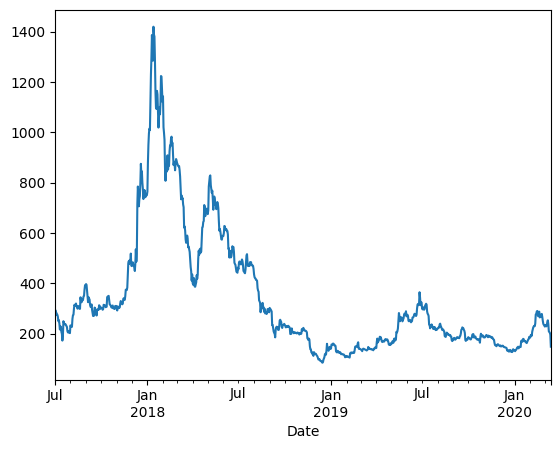

In [66]:
highs.plot()

In [67]:
tdf.resample('W').mean(numeric_only=True) # Resampling whole dataframe

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [68]:
tdf.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


# Reading Writing Data to Different Sources

## Refer to https://www.youtube.com/watch?v=N6hyN6BW6ao&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=11